<font size=5>Zillow Group- New Construction Pricing Problem</font>

In [20]:
import pandas as pd
import numpy as np

def model_outputs(model,leads,communities,price,count):
    #c=communities
    c_list=[]
    l_list=[]
    rev_list=[]
         
    if model=="Price per Lead":
        
        if (len(c_list)==0):
            l_list.append(leads)
            c_list.append(communities)
            rev_list.append(communities*leads*price)

        
        for i in range(35):
            if (count>0) & (count<13): 
                leads=leads+(leads*0.05)
                communities=communities+(communities*0.06)
                count=count+1
                l_list.append(leads)
                c_list.append(communities)
                rev_list.append(leads*communities*price)
                
            elif (count>=13) & (count<=24):    
                leads=leads+(leads*0.04)
                communities=communities+(communities*0.04)
                count=count+1
                l_list.append(leads)
                c_list.append(communities)
                rev_list.append(leads*communities*price)
            else:
                leads=leads+(leads*0.01)
                communities=communities+(communities*0.02)
                count=count+1
                l_list.append(leads)
                c_list.append(communities)
                rev_list.append(leads*communities*price)             
        
        data=pd.DataFrame({'timeframe':pd.date_range(start='1/1/2016', periods=36, freq='M').format(formatter=lambda x: x.strftime('%Y%m')),'leads': l_list,'m1_communities':c_list,'m1_revenue':rev_list})
        
    if model=="Price per Community":
        
        if (len(c_list)==0):
            c_list.append(communities)
            rev_list.append(communities*price)
            
        for i in range(35):
            if (count>0) & (count<13): 
                communities=communities+(communities*0.06*0.9)
                count=count+1
                c_list.append(communities)
                rev_list.append(communities*price)

            elif (count>=13) & (count<=24):    
                communities=communities+(communities*0.04*0.9)
                count=count+1
                c_list.append(communities)
                rev_list.append(communities*price)
            else:
                communities=communities+(communities*0.02*0.9)
                count=count+1
                c_list.append(communities)
                rev_list.append(communities*price) 
        data=pd.DataFrame({'timeframe':pd.date_range(start='1/1/2016', periods=36, freq='M').format(formatter=lambda x: x.strftime('%Y%m')),'m2_communities':c_list,'m2_revenue':rev_list})

    return data

In [2]:
m1=model_outputs("Price per Lead",4,6174,40,2)
m2=model_outputs("Price per Community",0,6174,400,2)

Model1: Data for Price per Lead model

In [3]:
print(m1) #Price per lead model

        leads  m1_communities    m1_revenue timeframe
0    4.000000     6174.000000  9.878400e+05    201601
1    4.200000     6544.440000  1.099466e+06    201602
2    4.410000     6937.106400  1.223706e+06    201603
3    4.630500     7353.332784  1.361984e+06    201604
4    4.862025     7794.532751  1.515889e+06    201605
5    5.105126     8262.204716  1.687184e+06    201606
6    5.360383     8757.936999  1.877836e+06    201607
7    5.628402     9283.413219  2.090031e+06    201608
8    5.909822     9840.418012  2.326205e+06    201609
9    6.205313    10430.843093  2.589066e+06    201610
10   6.515579    11056.693678  2.881630e+06    201611
11   6.841357    11720.095299  3.207254e+06    201612
12   7.115012    12188.899111  3.468966e+06    201701
13   7.399612    12676.455076  3.752034e+06    201702
14   7.695597    13183.513279  4.058200e+06    201703
15   8.003421    13710.853810  4.389349e+06    201704
16   8.323557    14259.287962  4.747520e+06    201705
17   8.656500    14829.65948

Model2: Data for Price per Community Model

In [4]:
print(m2) #price per community model

    m2_communities    m2_revenue timeframe
0      6174.000000  2.469600e+06    201601
1      6507.396000  2.602958e+06    201602
2      6858.795384  2.743518e+06    201603
3      7229.170335  2.891668e+06    201604
4      7619.545533  3.047818e+06    201605
5      8031.000992  3.212400e+06    201606
6      8464.675045  3.385870e+06    201607
7      8921.767498  3.568707e+06    201608
8      9403.542942  3.761417e+06    201609
9      9911.334261  3.964534e+06    201610
10    10446.546311  4.178619e+06    201611
11    11010.659812  4.404264e+06    201612
12    11407.043565  4.562817e+06    201701
13    11817.697134  4.727079e+06    201702
14    12243.134231  4.897254e+06    201703
15    12683.887063  5.073555e+06    201704
16    13140.506997  5.256203e+06    201705
17    13613.565249  5.445426e+06    201706
18    14103.653598  5.641461e+06    201707
19    14611.385128  5.844554e+06    201708
20    15137.394992  6.054958e+06    201709
21    15682.341212  6.272936e+06    201710
22    16246

In [6]:
dfinal = pd.merge(m1[['timeframe','leads','m1_communities','m1_revenue']],m2,on="timeframe", how='inner')
dfinal['revenue_diff']=dfinal['m1_revenue']-dfinal['m2_revenue'] #calculating difference in revenue (price per lead - price per community)
dfinal['communities_cnt_diff']=dfinal['m1_communities']-dfinal['m2_communities'] #calculating difference in no.of communities btw (price per lead - price per community)
dfinal

,timeframe,leads,m1_communities,m1_revenue,m2_communities,m2_revenue,revenue_diff,communities_cnt_diff
0,201601,4.000000,6174.000000,9.878400e+05,6174.000000,2.469600e+06,-1.481760e+06,0.000000
1,201602,4.200000,6544.440000,1.099466e+06,6507.396000,2.602958e+06,-1.503492e+06,37.044000
2,201603,4.410000,6937.106400,1.223706e+06,6858.795384,2.743518e+06,-1.519813e+06,78.311016
3,201604,4.630500,7353.332784,1.361984e+06,7229.170335,2.891668e+06,-1.529684e+06,124.162449
4,201605,4.862025,7794.532751,1.515889e+06,7619.545533,3.047818e+06,-1.531930e+06,174.987218
5,201606,5.105126,8262.204716,1.687184e+06,8031.000992,3.212400e+06,-1.525216e+06,231.203725
6,201607,5.360383,8757.936999,1.877836e+06,8464.675045,3.385870e+06,-1.508034e+06,293.261954
7,201608,5.628402,9283.413219,2.090031e+06,8921.767498,3.568707e+06,-1.478676e+06,361.645721
8,201609,5.909822,9840.418012,2.326205e+06,9403.542942,3.761417e+06,-1.435213e+06,436.875070
9,201610,6.205313,10430.843093,2.589066e+06,9911.334261,3.964534e+06,-1.375468e+06,519.508832


In [8]:
l,t,m1,m2,c1,c2,cd,rd=[],[],[],[],[],[],[],[]
for index in range(0,36,3): 
    leads,m1_revenue,m2_revenue,m1_communities,m2_communities,communities_cnt_diff,revenue_diff,timeframe=dfinal.iloc[index]['leads'],dfinal.iloc[index]['m1_revenue'],dfinal.iloc[index]['m2_revenue'],dfinal.iloc[index]['m1_communities'],dfinal.iloc[index]['m2_communities'],dfinal.iloc[index]['communities_cnt_diff'],dfinal.iloc[index]['revenue_diff'], dfinal.iloc[index]['timeframe']
    l.append(leads)
    t.append(timeframe)
    m1.append(m1_revenue)
    m2.append(m2_revenue)
    c1.append(m1_communities)
    c2.append(m2_communities)
    cd.append(communities_cnt_diff)
    rd.append(revenue_diff) 

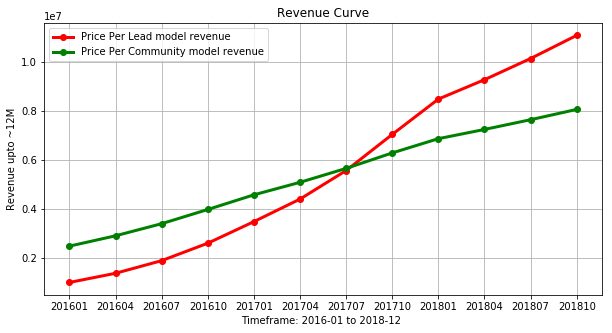

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
#plt.subplot(2, 1, 1)
plt.figure(figsize=(10, 5))
plt.title("Revenue Curve")
plt.xlabel("Timeframe: 2016-01 to 2018-12 ")
plt.ylabel("Revenue upto ~12M")
plt.grid()
plt.plot( t,m1, 'o-', color="r",label="Price Per Lead model revenue",linewidth=3)
plt.plot( t,m2, 'o-', color="g",label="Price Per Community model revenue",linewidth=3)
plt.legend(loc="best")

Based on the observed results, Price Per Lead revenue and Price Per Community models started off with a revenue impact of 987K dollars and 2.4M dollars in Jan 2016 and grew slowly over the next few months but in July'17, revenue impact of Price per lead model beats price per community model continues to grow. Since the priority is to focus on long term revenue impact over short term, in terms of revenue price per lead model wins the race 

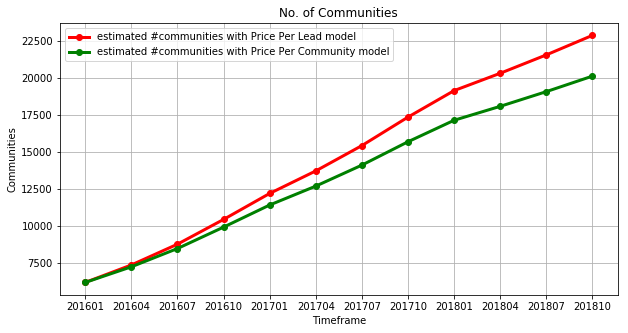

In [10]:
plt.figure(figsize=(10, 5))
plt.title("No. of Communities")
plt.xlabel("Timeframe")
plt.ylabel("Communities")
plt.grid()
plt.plot( t,c1 ,'o-', color="r",label="estimated #communities with Price Per Lead model",linewidth=3)
plt.plot( t,c2 ,'o-', color="g",label="estimated #communities with Price Per Community model",linewidth=3)
plt.legend(loc="best")

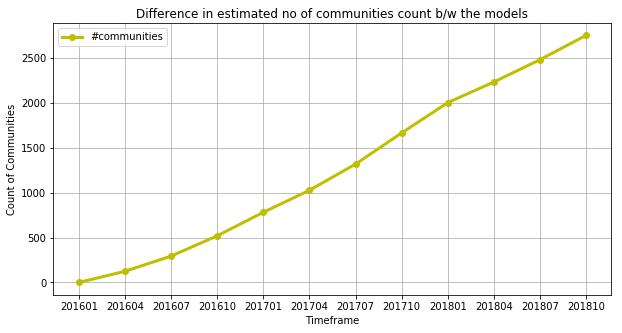

In [11]:
plt.figure(figsize=(10, 5))
plt.title("Difference in estimated no of communities count b/w the models")
plt.xlabel("Timeframe")
plt.ylabel("Count of Communities")
plt.grid()
plt.plot( t,cd, 'o-', color="y",label="#communities",linewidth=3)
plt.legend(loc="best")
#This implies that Price Per lead model has higher estimated #communities than Per per Communities model

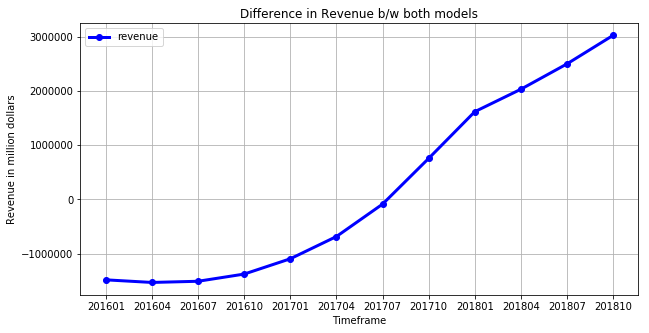

In [12]:
plt.figure(figsize=(10, 5))
plt.title("Difference in Revenue b/w both models")
plt.ylabel("Revenue in million dollars")
plt.xlabel("Timeframe")
plt.grid()
plt.plot( t,rd, 'o-', color="b",label="revenue",linewidth=3)
plt.legend(loc="best")

<font size=3>   Question 1.How many communities does each method result in for December 2018?</font>

In [15]:
out=dfinal.loc[dfinal['timeframe'] == '201812']
print("#communities with Pay per Lead model: "'{:,.0f}'.format(out.iloc[0]['m1_communities']))
print("#communities with Pay per Community model: "'{:,.0f}'.format(out.iloc[0]['m2_communities']))

#communities with Pay per Lead model: 23,798
#communities with Pay per Community model: 20,850


<font size=3> Question 2.What is the overall revenue impact?</font>

In [18]:
print("Revenue impact as of Dec'18 with Pay per Lead model: "'${:,.2f}'.format(out.iloc[0]['m1_revenue']))
print("Revenue impact as of Dec'18 with Pay per Community model: "'${:,.2f}'.format(out.iloc[0]['m2_revenue']))

Revenue impact as of Dec'18 with Pay per Lead model: $11,748,761.97
Revenue impact as of Dec'18 with Pay per Community model: $8,339,955.57


<font size=3>Question 3.What strategic advantages do you believe each plan provides? What are the drawbacks of each?</font>

Based on the given financial planning estimates on a term profitability perspective, Price per leads model wins over price per community model. However, in case if there were a lot of communities with fewer house listings, then Price per community model may win over price per leads model.

In case where house listings on communities are high, this implies that no of leads from them could also be high and if we charge builders based on price per community, we might end up with negative revenue impact. 

To strike a balance,my recommendation is to come up with a categories of communities based on the no of house listings in each community.

For example,

Type1 community: house lisitings count between 2-10;
Type2 community: house listings count between 11-30;
Type3 community: house listings count between 31-50;
Type4 community: house listings count between 50-100; 
Type5 community: house listings count between 101+ etc based on communities data.

Once, we have different categories of communities, we need to come up with an average estimate of leads expected from each community category and decide on price per lead



<font size=3> Question4.Are there any additional concerns or opportunities about your model based on the information
provided? Does anything seem unrealistic? </font>

According to market research results, total no of new construction communities as of today in US is 38K, it seems unrealistic based on the our estimates which say that as of Dec 2018, we would be having ~23K and ~20K communities as per price per lead and price per communities model respectively. I think that we might be over estimating #communities which inturn might effect our target revenue